## RQ2 Analysis
This notebook contains the analysis for RQ2. The goal of this analysis is to understand the evolution of the serialization format used in the dataset over the years.

### Load the data

In [2]:
from pathlib import Path

import pandas as pd

df = pd.read_csv(Path('../../results/repository_evolution_0_5014.csv'))
df_commits = pd.read_csv(Path('../../data/huggingface_sort_by_createdAt_top996939_commits_0_1035.csv'))

# grabs the date from df2 and adds it to df based on commit_hash and repo_url matching, implementation needs to be efficient
def add_date_to_df(df, df_commits):
    df['date'] = ""
    for index, row in df.iterrows():
        commit_hash = row['commit_hash']
        repo_url = row['repo_url']
        matched_row = df_commits.loc[
            (df_commits['commit_hash'] == commit_hash) & 
            (df_commits['repo_url'] == repo_url)
        ]
        
        df.at[index, 'date'] = matched_row['date'].values[0]
        df.at[index, 'message'] = matched_row['message'].values[0]
    return df

df = add_date_to_df(df, df_commits)
df['date'] = pd.to_datetime(df['date'])

# Reference date when safetensors was released
reference_date = pd.to_datetime("2022-09-23")

# Calculate elapsed days since reference date
df['elapsed_days'] = (df['date'] - reference_date).dt.days
df

,repo_url,commit_hash,model_file_path,serialization_format,Unnamed: 4,Unnamed: 5,Unnamed: 6,date,message,elapsed_days
0,microsoft/resnet-50,34c2154c194f829b11125337b98c8f5f9965ff19,microsoft/resnet-50/model.safetensors,safetensors,NaN,NaN,NaN,2024-02-13 16:24:05,Adding `safetensors` variant of this model (#4...,508
1,microsoft/resnet-50,f5104f67a0a8892c17fa776add3e55999dc67893,microsoft/resnet-50/tf_model.h5,h5/hdf5,NaN,NaN,NaN,2022-07-01 13:33:32,Add TF weights (#2)\n\n\n- Add TF weights (d84...,-84
2,microsoft/resnet-50,03cc283e1c00250565ec255ddfdb92ac61376c8a,microsoft/resnet-50/pytorch_model.bin,torch.save,NaN,NaN,NaN,2022-03-16 11:42:51,Add model,-191
3,microsoft/resnet-18,f45a6faa12e0381f5620c5c8d7e916bca90f2c44,microsoft/resnet-18/model.safetensors,safetensors,NaN,NaN,NaN,2023-05-08 07:19:40,Adding `safetensors` variant of this model (#2...,227
4,microsoft/resnet-18,2f536bd335677c6b111b3d103af458ef57a6145e,microsoft/resnet-18/tf_model.h5,h5/hdf5,NaN,NaN,NaN,2022-07-01 13:33:48,Add TF weights (#1)\n\n\n- Add TF weights (ea4...,-84
...,...,...,...,...,...,...,...,...,...,...
7195,speechbrain/SLU-direct-SLURP-hubert-enc,7ab725aa102ac04c090cf74d7bf25a829f87e243,speechbrain/SLU-direct-SLURP-hubert-enc/hubert...,torch.save,NaN,NaN,NaN,2021-11-30 09:50:06,add hubert slu model,-297
7196,speechbrain/SLU-direct-SLURP-hubert-enc,7ab725aa102ac04c090cf74d7bf25a829f87e243,speechbrain/SLU-direct-SLURP-hubert-enc/model....,torch.save,NaN,NaN,NaN,2021-11-30 09:50:06,add hubert slu model,-297
7197,speechbrain/SLU-direct-SLURP-hubert-enc,feed30d58811c727f8e12fb10264e563b7319827,speechbrain/SLU-direct-SLURP-hubert-enc/tokeni...,ONNX,NaN,NaN,NaN,2021-11-30 07:47:48,tokenizer,-297
7198,speechbrain/REAL-M-sisnr-estimator,9a645d81dd0ad4706ef29d910fd11388da06fce9,speechbrain/REAL-M-sisnr-estimator/encoder.ckpt,torch.save,NaN,NaN,NaN,2021-10-18 22:46:51,pushing the model files,-340


### Visualization of serialization format over the years

/var/folders/8r/8ct8ssl93_v7yvgp8s_cylgm0000gn/T/ipykernel_1456/2899534995.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_by_date['date'] = pd.to_datetime(df_by_date['date'])
/var/folders/8r/8ct8ssl93_v7yvgp8s_cylgm0000gn/T/ipykernel_1456/2899534995.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_by_date.loc[:, 'year'] = df_by_date['date'].dt.year


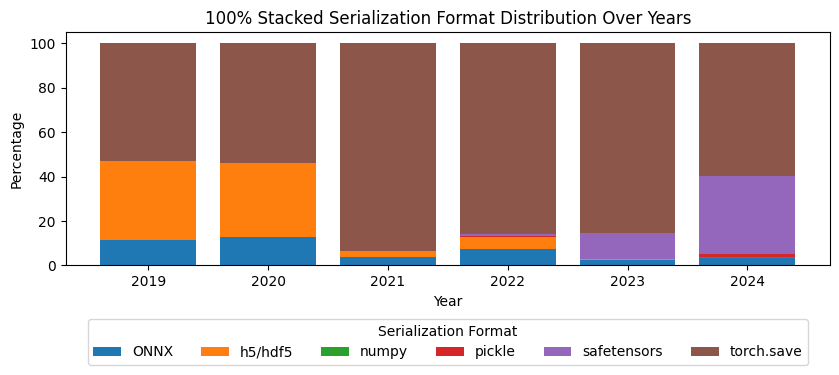

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Sample data
df = df[df['serialization_format'] != 'undetermined']
df_by_date = df[['date', 'serialization_format']]

# Convert the 'date' column to datetime and extract the year
df_by_date['date'] = pd.to_datetime(df_by_date['date'])
df_by_date.loc[:, 'year'] = df_by_date['date'].dt.year

# Group by year and serialization format, then count occurrences
grouped = df_by_date.groupby(['year', 'serialization_format']).size().unstack(fill_value=0)

# Normalize the values to 100%
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plot
fig, ax = plt.subplots(figsize=(10, 4))

# Cumulative values for stacked bars
cumulative_values = np.zeros(len(grouped_percentage))

for serialization_format in grouped_percentage.columns:
    ax.bar(grouped_percentage.index, grouped_percentage[serialization_format], 
           bottom=cumulative_values, label=serialization_format)
    cumulative_values += grouped_percentage[serialization_format]

# Add labels and title
ax.set_ylabel('Percentage')
ax.set_xlabel('Year')
ax.set_title('100% Stacked Serialization Format Distribution Over Years')
# ax.legend(title='Serialization Format')
# Move the legend outside of the plot
ax.legend(title='Serialization Format', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=6)
# Adjust the plot layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])



plt.show()


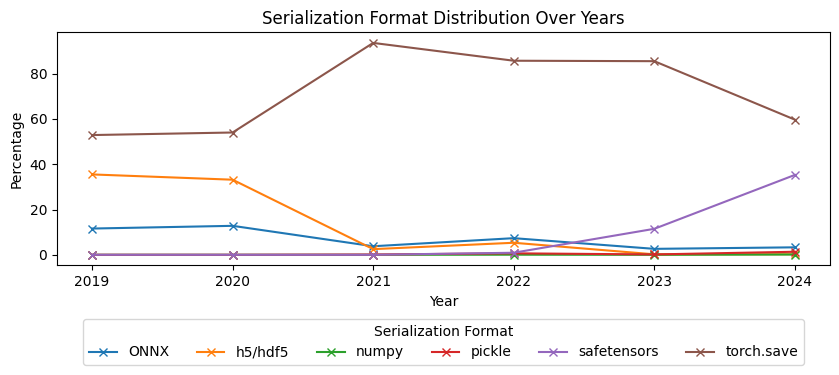

In [21]:
import pandas as pd
import matplotlib.pyplot as plt



# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the 'date' column
df['year'] = df['date'].dt.year

# Group by year and serialization format, then count occurrences
grouped = df.groupby(['year', 'serialization_format']).size().unstack(fill_value=0)

# Normalize the values to 100%
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plot the line chart
fig, ax = plt.subplots(figsize=(10, 4)) 

# Plot lines for each serialization format
for serialization_format in grouped_percentage.columns:
    ax.plot(grouped_percentage.index, grouped_percentage[serialization_format], marker='x', label=serialization_format)

# Add labels and title
ax.set_ylabel('Percentage')
ax.set_xlabel('Year')
ax.set_title('Serialization Format Distribution Over Years')
# ax.legend(title='Serialization Format')
# Move the legend outside of the plot
ax.legend(title='Serialization Format',  bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=6)

# Adjust the plot layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the rectangle to fit the legend

plt.show()



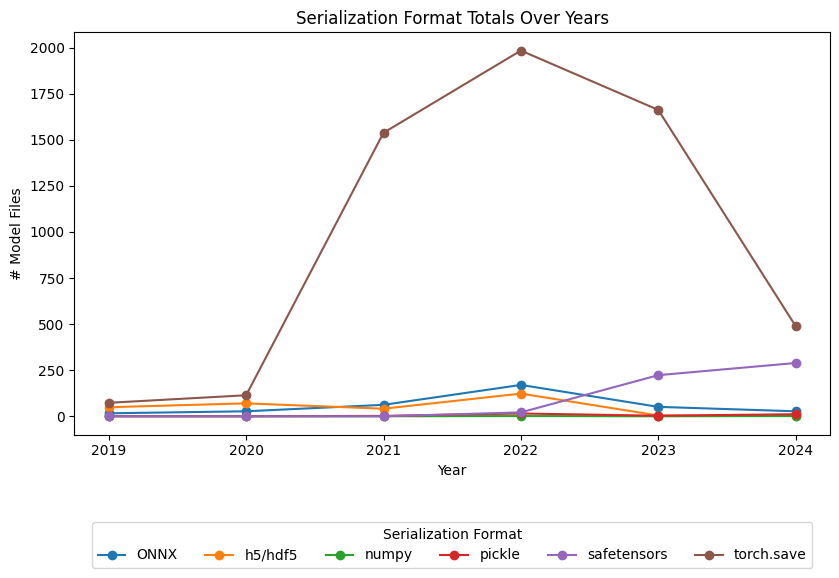

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the 'date' column
df['year'] = df['date'].dt.year

# Filter out rows with 'undetermined' serialization format
filtered_df = df[df['serialization_format'] != 'undetermined']
# Group by year and serialization format, then count occurrences
grouped_counts = filtered_df.groupby(['year', 'serialization_format']).size().unstack(fill_value=0)

# Set the size of the figure (width, height)
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust width and height as needed

# Plot the line chart with counts
for serialization_format in grouped_counts.columns:
    ax.plot(grouped_counts.index, grouped_counts[serialization_format], marker='o', label=serialization_format)

# Add labels and title
ax.set_ylabel('# Model Files')
ax.set_xlabel('Year')
ax.set_title('Serialization Format Totals Over Years')

# Move the legend outside of the plot
ax.legend(title='Serialization Format',  bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=6)

# Adjust the plot layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()
